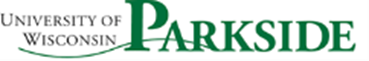


##CIS 614 Deep Learning##
##Homework 1

###Learning Objectives:
* Develop basic skills needed for Deep Learning
* Learn practical skills for storing, manipulating, and processing data.
* Learn techniques for working with tabular data (Martix Operations)



###Some basics
* Vectors can be interpreted geometrically as either points or directions in space.
* Dot products define the notion of angle to arbitrarily high-dimensional spaces.
* Hyperplanes are high-dimensional generalizations of lines and planes.  They can be used to define decision planes that are often used as the last step in a classification task.
* Matrix multiplication can be geometrically interpreted as uniform distortions of the underlying coordinates. They represent a very restricted, but mathematically clean, way to transform vectors.
* Linear dependence is a way to tell when a collection of vectors are in a lower dimensional space than we would expect (say you have $3$ vectors living in a $2$-dimensional space). The rank of a matrix is the size of the largest subset of its columns that are linearly independent.
* When a matrix's inverse is defined, matrix inversion allows us to find another matrix that undoes the action of the first. Matrix inversion is useful in theory, but requires care in practice owing to numerical instability.
* Determinants allow us to measure how much a matrix expands or contracts a space. A nonzero determinant implies an invertible (non-singular) matrix and a zero-valued determinant means that the matrix is non-invertible (singular).
* Tensor contractions and Einstein summation provide for a neat and clean notation for expressing many of the computations that are seen in machine learning.

###Reading: 
* Chapter 2:Preliminaries
  * Sections 2.1, 2.2, and 2.3



###Requirements:
1. Import the required libraries as required for solving the problems. 
2. Write functions containg python code for various operations that you perform to answer each of the following questions and then write function call statements after creating required parameters.
3. The code should be clearly documented for for full credits. 
References for 
 * https://www.python.org/dev/peps/pep-0008/ 
 * https://docs.python-guide.org/writing/documentation/


##Exercise I
 1. Random sampling the values for each element in a tensor say, $u$ from some probability distribution helps construct arrays to serve as parameters in a neural network. Initialize the values of the tensor(vector) $u$ with 12 values where the elements are randomly sampled from a standard Gaussian (normal) distribution with a mean of 0 and a standard deviation of 1. Display the length, and data type. Now change the tensor $u$ without altering either the number of elements or their values to a shapes (3, 4). Display the old and new memory locations of $u$. Are they the same? why or why not? Create another tensor $v$ of shape(1,12) holding constant values of your choice. Perform the following operations.

 (i) Display the sum of all the elements in $u$.\
 (ii) Name the technique that supports elementwise operations when the shape differ.\
 (iii) Add the tensors $u$, and $v$  
 (iv) Finally, include appropriate statements/commands to resolve the memory problem and demonstrate it.  


In [1]:
# importing libraries

import tensorflow as tf
import numpy as np
%matplotlib inline
from IPython import display

## Exercise II

1. What is the angle between
$$
\vec v_1 = \begin{bmatrix}
1 \\ 0 \\ -1 \\ 2
\end{bmatrix}, \qquad \vec v_2 = \begin{bmatrix}
3 \\ 1 \\ 0 \\ 1
\end{bmatrix}?
$$
2. True or false: $\begin{bmatrix}1 & 2\\0&1\end{bmatrix}$ and $\begin{bmatrix}1 & -2\\0&1\end{bmatrix}$ are inverses of one another?
3. Suppose that we draw a shape in the plane with area $100\mathrm{m}^2$.  What is the area after transforming the figure by the matrix
$$
\begin{bmatrix}
2 & 3\\
1 & 2
\end{bmatrix}.
$$
4. Which of the following sets of vectors are linearly independent?
 * $\left\{\begin{pmatrix}1\\0\\-1\end{pmatrix}, \begin{pmatrix}2\\1\\-1\end{pmatrix}, \begin{pmatrix}3\\1\\1\end{pmatrix}\right\}$
5. The vectors $e_1 = \begin{bmatrix}1\\0\end{bmatrix}$ and $e_2 = \begin{bmatrix}0\\1\end{bmatrix}$ are orthogonal.  What is the condition on a matrix $A$ so that $Ae_1$ and $Ae_2$ are orthogonal?
6. How can you write $\mathrm{tr}(\mathbf{A}^4)$ in Einstein notation for an arbitrary matrix $A$?

In [58]:
def exercise1():
  # question1
  # creating u vector
  print("\nQuestion 1\n")
  u = tf.random.normal(shape = [12], mean=0.0, stddev=1.0, dtype=tf.dtypes.float32, seed=None, name=None)
  print("Creating a random tensor u: \n{}".format(u))
  # reshaping vector u
  u = tf.reshape(u, [3, 4])
  print("\nReshaping u to 3*4: \n{}".format(u))
  #printing size and type of vecotr u
  print("\nSize of u: {}\nType of u: {}".format(tf.size(u), type(u)))
  #creating a constant vector v
  v = tf.constant([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]], dtype = tf.float32)
  print("Tensor v: {}".format(v))
  # sum of elements in vector u
  sum = tf.math.reduce_sum(u)
  print("Sum of elements of tensor u: {}".format(sum.numpy()))
  #question2: the broadcasting technique
  print("\nQuestion 2\n")
  print("""
  The techinique is called as broadcasting.

  What is broadcasting?
  Broadcasting is the process of making arrays with different shapes have compatible shapes for arithmetic operations. The terminology is borrowed from Numpy broadcasting.

  Broadcasting may be required for operations between multi-dimensional arrays of different ranks, or between multi-dimensional arrays with different but compatible shapes. Consider the addition X+v where X is a matrix (an array of rank 2) and v is a vector (an array of rank 1). To perform element-wise addition, XLA needs to "broadcast" the vector v to the same rank as the matrix X, by replicating v a certain number of times. The vector's length has to match at least one of the dimensions of the matrix.

  Your data comes in many shapes; your tensors should too. Ragged tensors are the TensorFlow equivalent of nested variable-length lists. They make it easy to store and process data with non-uniform shapes, including:

  Variable-length features, such as the set of actors in a movie.
  Batches of variable-length sequential inputs, such as sentences or video clips.
  Hierarchical inputs, such as text documents that are subdivided into sections, paragraphs, sentences, and words.
  Individual fields in structured inputs, such as protocol buffers.

  What you can do with a ragged tensor

  Ragged tensors are supported by more than a hundred TensorFlow operations, including math operations (such as tf.add and tf.reduce_mean), array operations (such as tf.concat and tf.tile), string manipulation ops (such as tf.substr), control flow operations (such as tf.while_loop and tf.map_fn), and many others.

  If you need to perform an elementwise transformation to the values of a RaggedTensor, you can use tf.ragged.map_flat_values, which takes a function plus one or more arguments, and applies the function to transform the RaggedTensor's values.

  Also Sparse tensors:

  Sometimes, your data is sparse, like a very wide embedding space. TensorFlow supports tf.sparse.SparseTensor and related operations to store sparse data efficiently.
    
  
  """)
  #question3
  # adding vectors u and v by using reshape on vector v to conduct broadcasting
  print("\nQuestion 3\n")
  v_new = tf.reshape(v, [3, 4])
  sum1 = u + v_new
  print("Addition of u and v after reshaping v:\n {}".format(sum1))
  
  # question4
  print("\nQuestion 4\n")
  print("""


  from tensorflow.compat.v1 import ConfigProto

  from tensorflow.compat.v1 import InteractiveSession

  config = ConfigProto()

  config.gpu_options.allow_growth = True

  session = InteractiveSession(config=config)

  Allocating memory as neccesary:

  config = tf.ConfigProto()
  config.gpu_options.allow_growth = True
  sess = tf.Session(config=config)
  from tensorflow.compat.v1 import ConfigProto
  """)

In [62]:
def exercise2():
  # question1
  # angle between vectors
  print("\nQuestion 1\n")
  x = tf.constant([1.0, 0, -1, 2], dtype=tf.float32)
  y = tf.constant([3.0, 1, 0, 1])
  angle = tf.acos(tf.tensordot(x, y, axes=1) / (tf.norm(x) * tf.norm(y)))
  print("Angle: {}".format(angle.numpy() * 100))

  # question2
  # finding inverse of A and then comparing using a.all()
  print("\nQuestion 2\n")
  A = np.array(([1, 2], [0, 1]))
  A
  A_inv = np.linalg.inv(A)
  A_inv
  B = np.array(([1, -2], [0, 1]))
  print(A_inv == B)
  if (A_inv == B).all():
    print("Thus the inverse is as previously thought of")
  else:
    print("Inverse is different")

  # question3
  # finding determinant to determine impact on area after transform
  print("\nQuestion 3\n")
  a = np.array(([2, 3], [1, 2]))
  det_a = np.linalg.det(a)
  area = 100
  new_area = area * det_a
  print("The new area is: {} m2, the area thus remains unchanged.".format(new_area))

  #question4
  print("\nQuestion 4\n")

  print("The vectors are all linearly independent and span a 3d space")

  #question5

  print("\nQuestion 5:\nWe say that two vectors are orthogonal when they are perpendicular to each other. That is the angle between them is 0 degrees which is when their dot product is 0.")



In [63]:
exercise1()


Question 1

Creating a random tensor u: 
[ 0.2921412   1.6181664  -0.54763347  0.3805595   0.20768791  0.42551503
  0.05226576 -0.45329624  0.6320517  -0.3335389  -0.20452854 -0.7801275 ]

Reshaping u to 3*4: 
[[ 0.2921412   1.6181664  -0.54763347  0.3805595 ]
 [ 0.20768791  0.42551503  0.05226576 -0.45329624]
 [ 0.6320517  -0.3335389  -0.20452854 -0.7801275 ]]

Size of u: 12
Type of u: <class 'tensorflow.python.framework.ops.EagerTensor'>
Tensor v: [[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]]
Sum of elements of tensor u: 1.2892627716064453

Question 2


  The techinique is called as broadcasting.

  What is broadcasting?
  Broadcasting is the process of making arrays with different shapes have compatible shapes for arithmetic operations. The terminology is borrowed from Numpy broadcasting.

  Broadcasting may be required for operations between multi-dimensional arrays of different ranks, or between multi-dimensional arrays with different but compatible shapes. Consider the add

In [64]:
exercise2()


Question 1

Angle: 90.78301191329956

Question 2

[[ True  True]
 [ True  True]]
Thus the inverse is as previously thought of

Question 3

The new area is: 100.0 m2, the area thus remains unchanged.

Question 4

The vectors are all linearly independent and span a 3d space

Question 5:
We say that two vectors are orthogonal when they are perpendicular to each other. That is the angle between them is 0 degrees which is when their dot product is 0.
